## 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', palette='pastel')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 2. Load Dataset

In [ ]:
data = '/content/clothes_price_prediction_data.csv'

df = pd.read_csv(data)
print(f'The shape dataset is {df.shape}')

The shape dataset is (1000, 6)


## 3. Data Understanding

In [ ]:
df.sample(5)

,Brand,Category,Color,Size,Material,Price
715,Under Armour,Jacket,Blue,XS,Polyester,17
255,Puma,Jacket,White,XXL,Wool,41
426,Nike,Sweater,Red,XXL,Polyester,110
199,New Balance,T-shirt,Red,XXL,Nylon,131
323,Reebok,Sweater,White,XL,Denim,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
cats = [i for i in df.columns if df[i].dtypes == 'object']
nums = ['Price']

In [ ]:
for i in cats:
  print(f'Value Counts Col {i}:')
  print(df[i].value_counts())
  print()

Value Counts Col Brand:
Under Armour    179
Puma            168
Adidas          166
Nike            165
New Balance     164
Reebok          158
Name: Brand, dtype: int64

Value Counts Col Category:
Jacket     191
Shoes      172
Jeans      167
Dress      166
Sweater    160
T-shirt    144
Name: Category, dtype: int64

Value Counts Col Color:
Yellow    173
White     171
Red       168
Black     163
Blue      163
Green     162
Name: Color, dtype: int64

Value Counts Col Size:
XS     196
XXL    173
XL     167
S      166
M      157
L      141
Name: Size, dtype: int64

Value Counts Col Material:
Polyester    175
Silk         173
Wool         172
Denim        163
Cotton       162
Nylon        155
Name: Material, dtype: int64



In [ ]:
df[cats].describe()

,Brand,Category,Color,Size,Material
count,1000,1000,1000,1000,1000
unique,6,6,6,6,6
top,Under Armour,Jacket,Yellow,XS,Polyester
freq,179,191,173,196,175


In [ ]:
df[nums].describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


## 3. Feature Engineering

In [ ]:
df.isnull().sum() * 100 / len(df)

Brand       0.0
Category    0.0
Color       0.0
Size        0.0
Material    0.0
Price       0.0
dtype: float64

In [ ]:
data_duplicated = df.duplicated()
data_duplicated.count()

1000

In [ ]:
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
Q1, Q3

(59.75, 150.0)

In [ ]:
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-75.625, 285.375)

In [ ]:
df[(df.Price < lower_limit) | (df.Price > upper_limit)].count()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

## 4. Exploratory Data Analysis

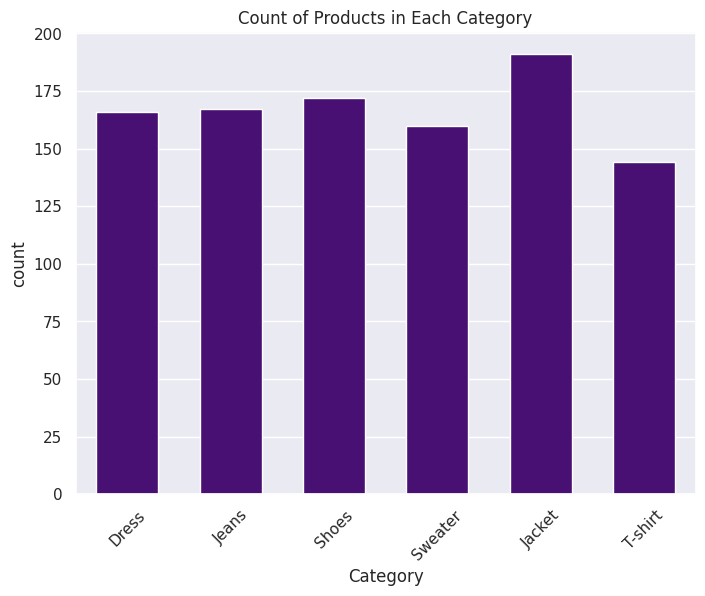

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Category', color='indigo', width=0.6)
plt.xticks(rotation=45)
plt.title('Count of Products in Each Category')
plt.show()

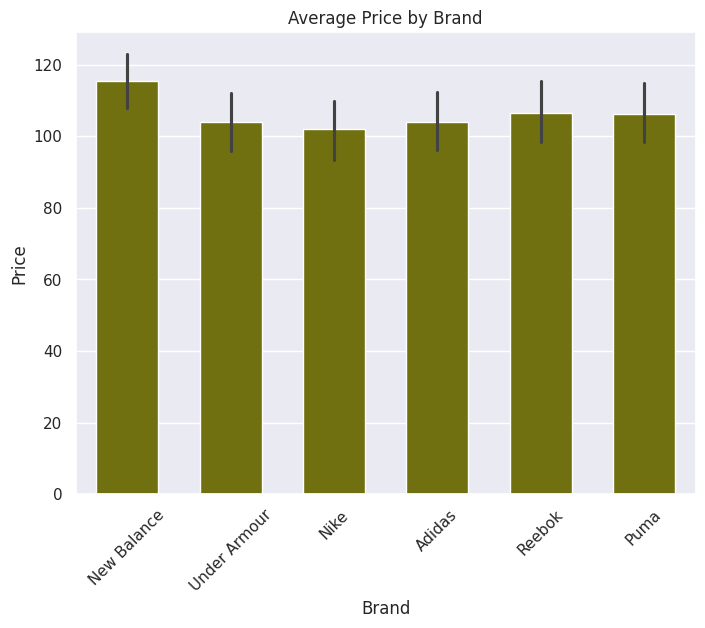

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Brand', y='Price', color='olive', width=0.6)
plt.xticks(rotation=45)
plt.title('Average Price by Brand')
plt.show()

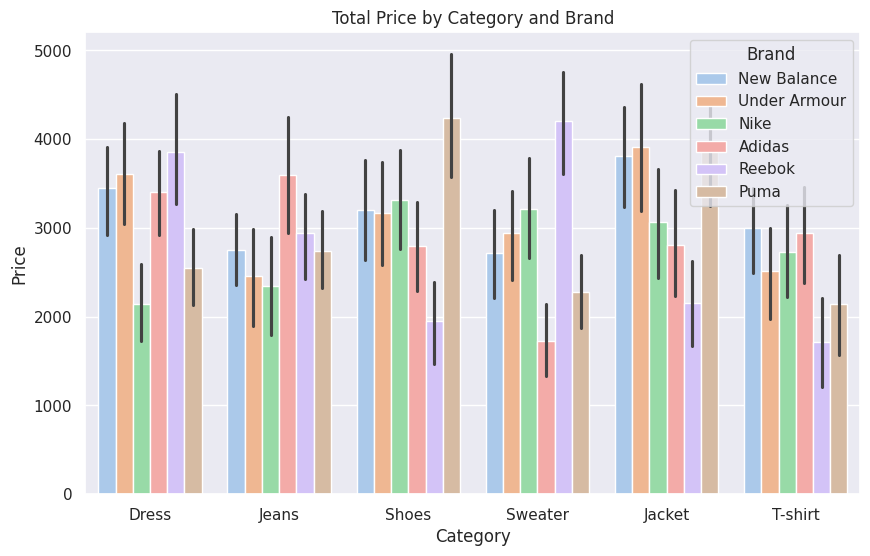

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Price', hue='Brand', estimator=sum)
plt.title('Total Price by Category and Brand')
plt.show()

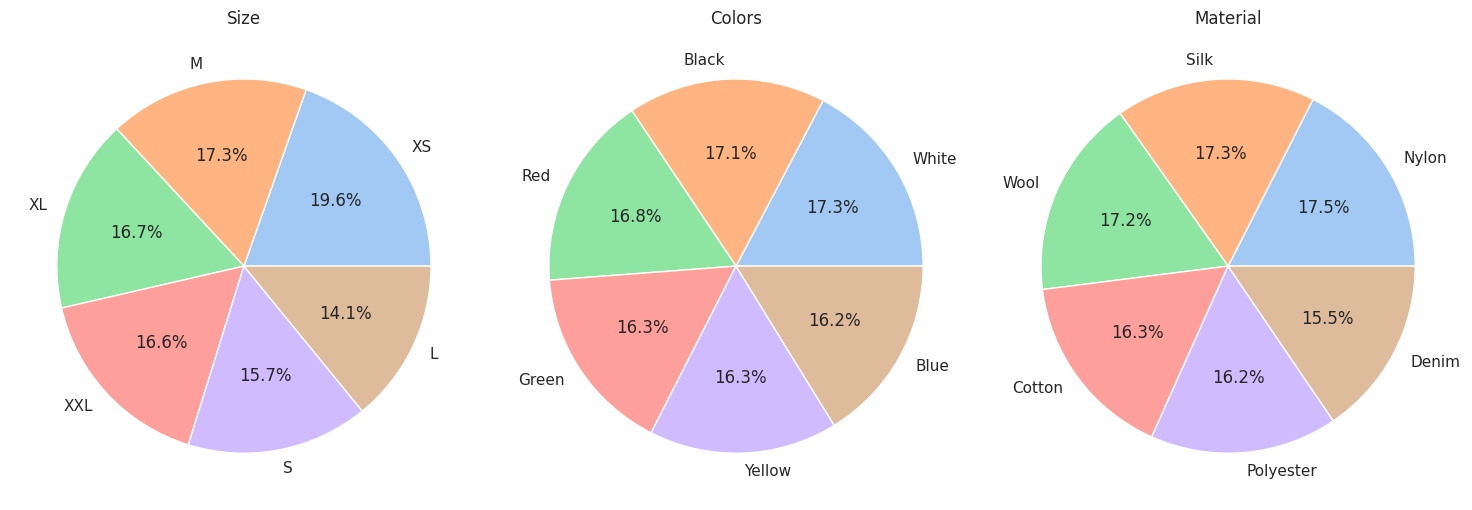

In [ ]:
sizes = df['Size'].value_counts()
colors = df['Color'].value_counts()
materials = df['Material'].value_counts()


labels_size = df['Size'].unique()
labels_color = df['Color'].unique()
labels_material = df['Material'].unique()

plt.figure(figsize=(15, 12))
plt.subplot(1, 3, 1)
plt.pie(sizes, labels=labels_size, autopct='%1.1f%%')
plt.title('Size')

plt.subplot(1, 3, 2)
plt.pie(colors, labels=labels_color, autopct='%1.1f%%')
plt.title('Colors')

plt.subplot(1, 3, 3)
plt.pie(materials, labels=labels_material, autopct='%1.1f%%')
plt.title('Material')

plt.tight_layout()
plt.show()

## 5. Data Preprocessing

In [ ]:
columns_to_encode = ['Brand', 'Category', 'Size', 'Color', 'Material']

label_encoders = {}

for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])

df

,Brand,Category,Color,Size,Material,Price,Brand_encoded,Category_encoded,Size_encoded,Color_encoded,Material_encoded
0,New Balance,Dress,White,XS,Nylon,182,1,0,4,4,2
1,New Balance,Jeans,Black,XS,Silk,57,1,2,4,0,4
2,Under Armour,Dress,Red,M,Wool,127,5,0,1,3,5
3,Nike,Shoes,Green,M,Cotton,77,2,3,1,2,0
4,Adidas,Sweater,White,M,Nylon,113,0,4,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176,3,2,0,0,3
996,Puma,Jacket,Red,XXL,Silk,110,3,1,5,3,4
997,Reebok,Sweater,Blue,XS,Denim,127,4,4,4,1,1
998,Under Armour,Sweater,Black,XXL,Denim,69,5,4,5,0,1


In [ ]:
drop_col = ['Brand', 'Category', 'Size', 'Color', 'Material']

df2 = df.drop(drop_col, axis=1)
df2.head()

,Price,Brand_encoded,Category_encoded,Size_encoded,Color_encoded,Material_encoded
0,182,1,0,4,4,2
1,57,1,2,4,0,4
2,127,5,0,1,3,5
3,77,2,3,1,2,0
4,113,0,4,1,4,2


In [ ]:
col_to_move = 'Price'

price_column = df2.pop(col_to_move)
df2[col_to_move] = price_column

df2

,Brand_encoded,Category_encoded,Size_encoded,Color_encoded,Material_encoded,Price
0,1,0,4,4,2,182
1,1,2,4,0,4,57
2,5,0,1,3,5,127
3,2,3,1,2,0,77
4,0,4,1,4,2,113
...,...,...,...,...,...,...
995,3,2,0,0,3,176
996,3,1,5,3,4,110
997,4,4,4,1,1,127
998,5,4,5,0,1,69


In [ ]:
df2['Price'] = df2['Price'] * 100

In [ ]:
X = df2.drop('Price', axis=1)
y = df2['Price']

print('Shape X : ', X.shape)
print('Shape y : ', y.shape)

Shape X :  (1000, 5)
Shape y :  (1000,)


In [ ]:
# scaler = StandardScaler()
# scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model & Evaluation

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 29594546.94366933


In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train,y_train)

pred=xgboost_model.predict(X_test)

mse=mean_squared_error(y_test,pred)
print(f"Mean squared error {mse} XGBoost")

Mean squared error 45374190.6600731 XGBoost
